In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

dataset = pd.read_csv("data.csv")
dataset[['diagnosis']].groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [2]:
from sklearn.model_selection import train_test_split
trainingDataSet, evaluationDataSet = train_test_split(dataset, test_size = 0.2)
print(
    " Training data set : ",
     trainingDataSet.shape,
     "\n",
    "Evalutation data set : ",
    evaluationDataSet.shape
)

 Training data set :  (455, 33) 
 Evalutation data set :  (114, 33)


In [14]:
evaluationDataSetCopy = evaluationDataSet.copy()
trainingDataSetCopy = trainingDataSet.copy()
#trainingDataSetLabels = classifier.fit(trainingDataSet['diagnosis'])
trainingDataSetLabels = trainingDataSet[['diagnosis']];
evaluationDataSetLabels = evaluationDataSet[['diagnosis']]

evaluationDataSetCopy.pop('id')
evaluationDataSetCopy.pop('diagnosis')
evaluationDataSetCopy.pop('Unnamed: 32')

trainingDataSetCopy.pop('id')
trainingDataSetCopy.pop('diagnosis')
trainingDataSetCopy.pop('Unnamed: 32')



trainingDataSetUnlabeled = trainingDataSetCopy
evaluationDataSetUnlabeled = evaluationDataSetCopy;

In [5]:
trainingDataSetUnlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 255 to 417
Data columns (total 30 columns):
radius_mean                455 non-null float64
texture_mean               455 non-null float64
perimeter_mean             455 non-null float64
area_mean                  455 non-null float64
smoothness_mean            455 non-null float64
compactness_mean           455 non-null float64
concavity_mean             455 non-null float64
concave points_mean        455 non-null float64
symmetry_mean              455 non-null float64
fractal_dimension_mean     455 non-null float64
radius_se                  455 non-null float64
texture_se                 455 non-null float64
perimeter_se               455 non-null float64
area_se                    455 non-null float64
smoothness_se              455 non-null float64
compactness_se             455 non-null float64
concavity_se               455 non-null float64
concave points_se          455 non-null float64
symmetry_se                45

In [6]:
trainingDataSetLabels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 255 to 417
Data columns (total 1 columns):
diagnosis    455 non-null object
dtypes: object(1)
memory usage: 7.1+ KB


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(trainingDataSetLabels)
trainingDataSetLabels=le.transform(trainingDataSetLabels)

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(evaluationDataSetLabels)
evaluationDataSetLabels=le.transform(evaluationDataSetLabels)


C:\Users\kopparapu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kopparapu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skrules import SkopeRules
clf = SkopeRules(random_state=np.random, n_estimators=10)
clf.fit(trainingDataSetUnlabeled, trainingDataSetLabels)

SkopeRules(bootstrap=False, bootstrap_features=False, feature_names=None,
           max_depth=3, max_depth_duplication=None, max_features=1.0,
           max_samples=0.8, max_samples_features=1.0, min_samples_split=2,
           n_estimators=10, n_jobs=1, precision_min=0.5,
           random_state=<module 'numpy.random' from 'C:\\Users\\kopparapu\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
           recall_min=0.01, verbose=0)

In [12]:
print('The 4 most precise rules are the following:')
for rule in clf.rules_[:4]:
    print(rule[0])

The 4 most precise rules are the following:
__C__12 > 1.5399999618530273 and __C__16 <= 0.13565000146627426 and __C__27 > 0.1423499956727028
__C__23 > 710.2000122070312 and __C__26 > 0.2248000055551529 and __C__7 > 0.04891999997198582
__C__1 > 14.119999885559082 and __C__22 > 105.95000076293945 and __C__7 > 0.0467349998652935
__C__13 > 18.335000038146973 and __C__2 > 76.97999954223633 and __C__27 > 0.13580000400543213


In [26]:
scoring = clf.score_top_rules(evaluationDataSetUnlabeled)
#scoring_rf = clf.predict_proba(evaluationDataSetUnlabeled)
print(str(len(clf.rules_)) + ' rules have been built.')
print('The 5 most precise rules are the following:')
for rule in clf.rules_[:5]:
    print(rule[0])

52 rules have been built.
The 5 most precise rules are the following:
__C__12 > 1.5399999618530273 and __C__16 <= 0.13565000146627426 and __C__27 > 0.1423499956727028
__C__23 > 710.2000122070312 and __C__26 > 0.2248000055551529 and __C__7 > 0.04891999997198582
__C__1 > 14.119999885559082 and __C__22 > 105.95000076293945 and __C__7 > 0.0467349998652935
__C__13 > 18.335000038146973 and __C__2 > 76.97999954223633 and __C__27 > 0.13580000400543213
__C__12 > 1.3974999785423279 and __C__22 > 108.25 and __C__7 > 0.0467349998652935


In [28]:
for rule in clf.rules_:
    print(rule[0])

__C__12 > 1.5399999618530273 and __C__16 <= 0.13565000146627426 and __C__27 > 0.1423499956727028
__C__23 > 710.2000122070312 and __C__26 > 0.2248000055551529 and __C__7 > 0.04891999997198582
__C__1 > 14.119999885559082 and __C__22 > 105.95000076293945 and __C__7 > 0.0467349998652935
__C__13 > 18.335000038146973 and __C__2 > 76.97999954223633 and __C__27 > 0.13580000400543213
__C__12 > 1.3974999785423279 and __C__22 > 108.25 and __C__7 > 0.0467349998652935
__C__0 > 10.405499935150146 and __C__13 > 13.474999904632568 and __C__27 > 0.14545000344514847
__C__13 > 18.335000038146973 and __C__22 > 81.48500061035156 and __C__27 > 0.14545000344514847
__C__13 > 13.474999904632568 and __C__27 > 0.14545000344514847 and __C__3 > 330.90000915527344
__C__10 > 0.1918499991297722 and __C__22 > 105.95000076293945 and __C__7 > 0.04770500026643276
__C__13 > 22.005000114440918 and __C__22 > 115.3499984741211 and __C__27 > 0.08502000197768211
__C__20 > 15.410000324249268 and __C__26 > 0.21289999783039093 an

In [22]:
y_test=evaluationDataSetLabels

__C__12 > 1.5399999618530273 and __C__16 <= 0.13565000146627426 and __C__27 > 0.1423499956727028
__C__23 > 710.2000122070312 and __C__26 > 0.2248000055551529 and __C__7 > 0.04891999997198582
__C__1 > 14.119999885559082 and __C__22 > 105.95000076293945 and __C__7 > 0.0467349998652935
__C__13 > 18.335000038146973 and __C__2 > 76.97999954223633 and __C__27 > 0.13580000400543213
__C__12 > 1.3974999785423279 and __C__22 > 108.25 and __C__7 > 0.0467349998652935


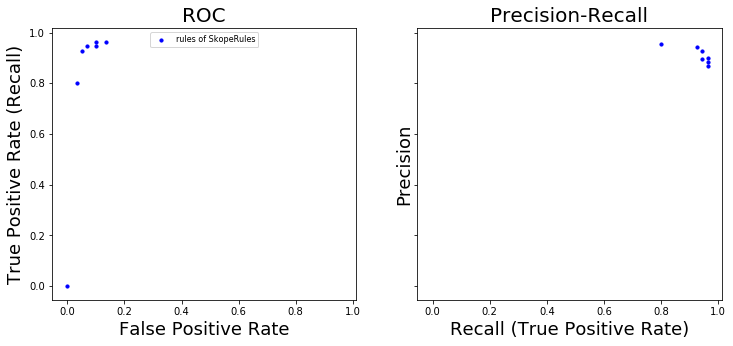

In [25]:

from sklearn.metrics import roc_curve, precision_recall_curve
curves = [roc_curve, precision_recall_curve]
xlabels = ['False Positive Rate', 'Recall (True Positive Rate)']
ylabels = ['True Positive Rate (Recall)', 'Precision']
fig, axes = plt.subplots(1, 2, figsize=(12, 5),
sharex=True, sharey=True)
ax = axes[0]
fpr, tpr, _ = roc_curve(y_test, scoring)
#fpr_rf, tpr_rf, _ = roc_curve(y_test, scoring_rf)
ax.scatter(fpr[:-1], tpr[:-1], c='b', s=10, label="rules of SkopeRules")
#ax.step(fpr_RF, tpr_RF, linestyle='-.', c='g', lw=1, where='post',label="Random Forest")
ax.set_title("ROC", fontsize=20)
ax.legend(loc='upper center', fontsize=8)
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=18)
ax = axes[1]
precision, recall, _ = precision_recall_curve(y_test, scoring)
#precision_rf, recall_rf, _ = precision_recall_curve(y_test, scoring_rf)
ax.scatter(recall[1:-1], precision[1:-1], c='b', s=10,label="rules of SkopeRules")
#ax.step(recall_RF, precision_RF, linestyle='-.', c='g', lw=1, where='post',label="Random Forest")
ax.set_title("Precision-Recall", fontsize=20)
ax.set_xlabel('Recall (True Positive Rate)', fontsize=18)
ax.set_ylabel('Precision', fontsize=18)
plt.show()
